In [2]:
# Introduction

Welcome to the Pokémon Exploratory Data Analysis (EDA) project!  
In this notebook, we will analyze the Pokémon dataset to uncover patterns, trends, and insights about various Pokémon species.  
We will start by loading and cleaning the data, followed by statistical analysis and visualizations to better understand the characteristics and distributions within the dataset.  
Let's dive in and explore the world of Pokémon!

SyntaxError: unterminated string literal (detected at line 6) (2775195618.py, line 6)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Show plots inline
%matplotlib inline

#Set the style of seaborn
sns.set(style="whitegrid")

In [ ]:
## Loading the Data

Let's begin by loading the Pokémon dataset into a pandas DataFrame.  
We'll inspect the first few rows to get an overview of the data structure and its features.

In [2]:
# Define the file path for the Pokémon dataset
file_path = 'Pokemon.csv'

# Load the Pokémon dataset into a pandas DataFrame
df = pd.read_csv(file_path, index_col='Name')

# Display the first 10 rows of the DataFrame
df.head(10)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [3]:
df.columns = df.columns.str.upper()  # Convert column names to uppercase

df.head()

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
#Display the dataframe columns
print("The columns of the dataframe are: ", df.columns)

# Display summary statistics of the DataFrame
print("Summary Statistics:")
display(df.describe())

# Display the shape of the DataFrame
print(f"\nDataset Shape: {df.shape}")

The columns of the dataframe are:  Index(['#', 'TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK',
       'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')
Summary Statistics:


,#,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000



Dataset Shape: (800, 12)


In [ ]:
## Data Cleaning

Before proceeding with our analysis, it's important to clean the dataset to ensure accuracy and consistency.  
In this section, we will:

- Check for missing values and handle them appropriately
- Identify and address any duplicate entries
- Ensure data types are correct for each column
- Standardize categorical values if necessary

Let's prepare our Pokémon data for deeper exploration!

In [5]:
## The index of Mega Pokemons has extra text. Remove all text before "Mega"
df.index = df.index.str.replace(".*(?=Mega)", "", regex=True)

df.head(10)

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [6]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2. Handle missing values in 'Type 2'
df['TYPE 2'] = df['TYPE 2'].fillna('None')

# 3. Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates based on all columns
df = df[~duplicates]

# 4. Validate data types
print("\nData types after cleaning:")
print(df.dtypes)

# 5. Standardize categorical values
df['LEGENDARY'] = df['LEGENDARY'].astype(bool)

# 6. Summary after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

Missing values per column:
#               0
TYPE 1          0
TYPE 2        386
TOTAL           0
HP              0
ATTACK          0
DEFENSE         0
SP. ATK         0
SP. DEF         0
SPEED           0
GENERATION      0
LEGENDARY       0
dtype: int64
Number of duplicate rows: 2

Data types after cleaning:
#              int64
TYPE 1        object
TYPE 2        object
TOTAL          int64
HP             int64
ATTACK         int64
DEFENSE        int64
SP. ATK        int64
SP. DEF        int64
SPEED          int64
GENERATION     int64
LEGENDARY       bool
dtype: object

Missing values after cleaning:
#             0
TYPE 1        0
TYPE 2        0
TOTAL         0
HP            0
ATTACK        0
DEFENSE       0
SP. ATK       0
SP. DEF       0
SPEED         0
GENERATION    0
LEGENDARY     0
dtype: int64
Number of duplicate rows after cleaning: 0


In [8]:
print(df.loc['Raikou']) # Display the row for Raikou
print(df.iloc[243]) # Display the row for Raikou using iloc

#                  243
TYPE 1        Electric
TYPE 2            None
TOTAL              580
HP                  90
ATTACK              85
DEFENSE             75
SP. ATK            115
SP. DEF            100
SPEED              115
GENERATION           2
LEGENDARY         True
Name: Raikou, dtype: object
#                225
TYPE 1           Ice
TYPE 2        Flying
TOTAL            330
HP                45
ATTACK            55
DEFENSE           45
SP. ATK           65
SP. DEF           45
SPEED             75
GENERATION         2
LEGENDARY      False
Name: Delibird, dtype: object


In [9]:
# Display only the legendary Pokémon
legendary_pokemon = df[df['LEGENDARY'] == True]
display(legendary_pokemon.head())

# Display the Pokémon with the maxium defense
print("Max Defense Pokémon: ", df['DEFENSE'].idxmax())
# Diplay the maxium attack value
print("Max Attack Value: ", df['ATTACK'].argmax())

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Articuno,144,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,145,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,146,Fire,Flying,580,90,100,90,125,85,90,1,True
Mewtwo,150,Psychic,None,680,106,110,90,154,90,130,1,True
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True


Max Defense Pokémon:  Mega Steelix
Max Attack Value:  163


In [10]:
#Display the DataFrame sorted by the 'TOTAL' column in descending order
print("Pokémon sorted by TOTAL stats:")
df.sort_values(by='TOTAL', ascending=False)

Pokémon sorted by TOTAL stats:


,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Mega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Mewtwo Y,150,Psychic,None,780,106,150,70,194,120,140,1,True
KyogrePrimal Kyogre,382,Water,None,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...
Weedle,13,Bug,Poison,195,40,35,30,20,20,50,1,False
Caterpie,10,Bug,None,195,45,30,35,20,20,45,1,False
Kricketot,401,Bug,None,194,37,25,41,25,41,25,4,False


In [11]:
# Display all types of Pokémon
print("Types:", df['TYPE 1'].unique())
# Display the number of types
print("The number of types are: ", df['TYPE 1'].nunique())

Types: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The number of types are:  18


In [12]:
# Display the count of each type of Pokémon
df['TYPE 1'].value_counts() 


TYPE 1
Water       111
Normal       98
Grass        70
Bug          69
Psychic      56
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [ ]:
## Visualizations

Now that our Pokémon dataset is cleaned and ready, let's begin exploring it through visualizations!  
We'll use various plots to uncover patterns, compare stats, and gain insights into the distribution and relationships of different Pokémon features.  
Let's visualize and analyze the data!

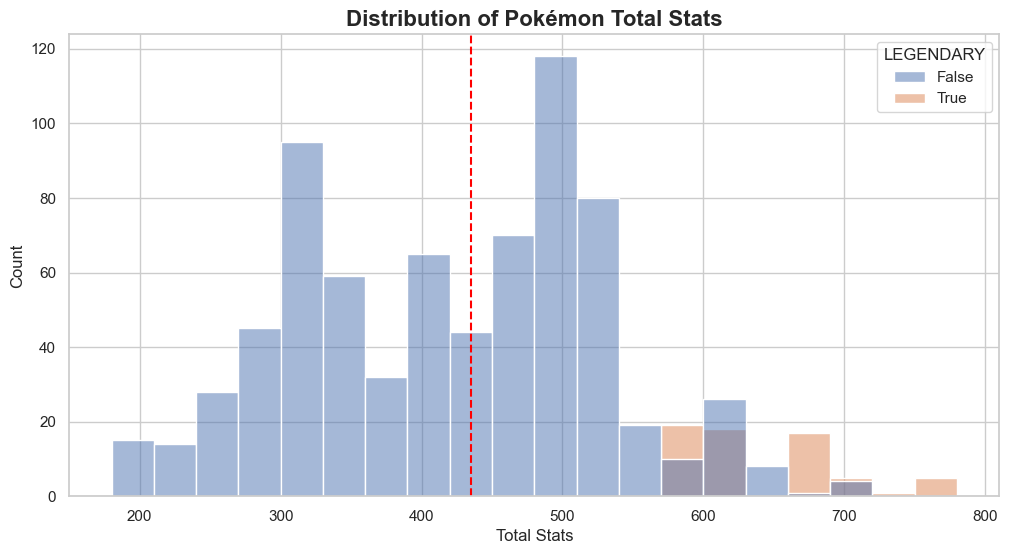

In [81]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='TOTAL', bins= 20, hue='LEGENDARY')
plt.title('Distribution of Pokémon Total Stats', fontsize=16, fontweight='bold')
plt.xlabel('Total Stats')
plt.axvline(df['TOTAL'].mean(), color = 'red', linestyle='dashed', label='Mean')
plt.show()

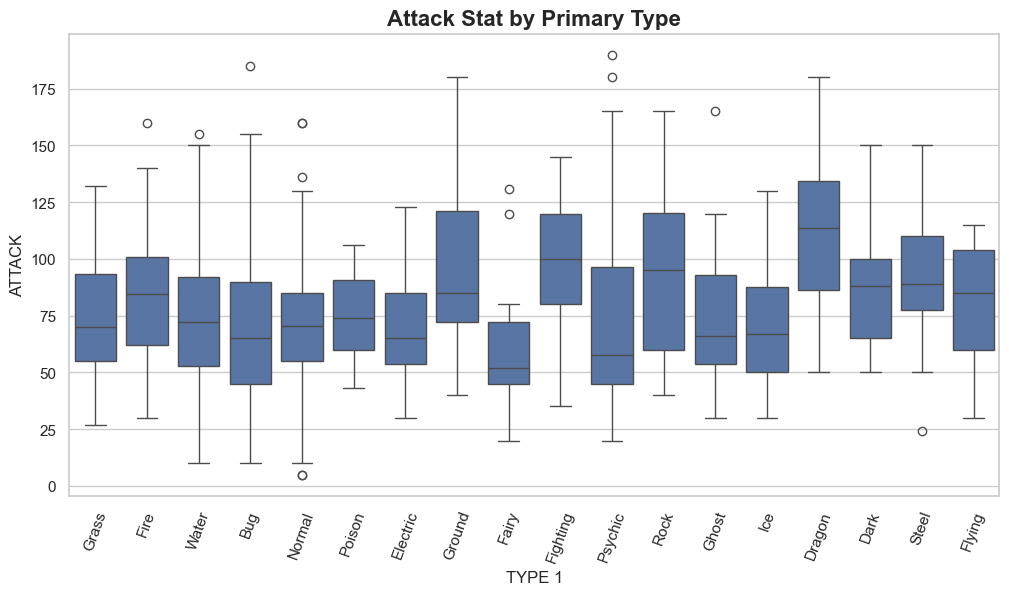

In [82]:
# Attack stat by Primary Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='TYPE 1', y='ATTACK', data=df)
plt.xticks(rotation=70)
plt.title('Attack Stat by Primary Type', fontsize=16, fontweight='bold')
plt.show()

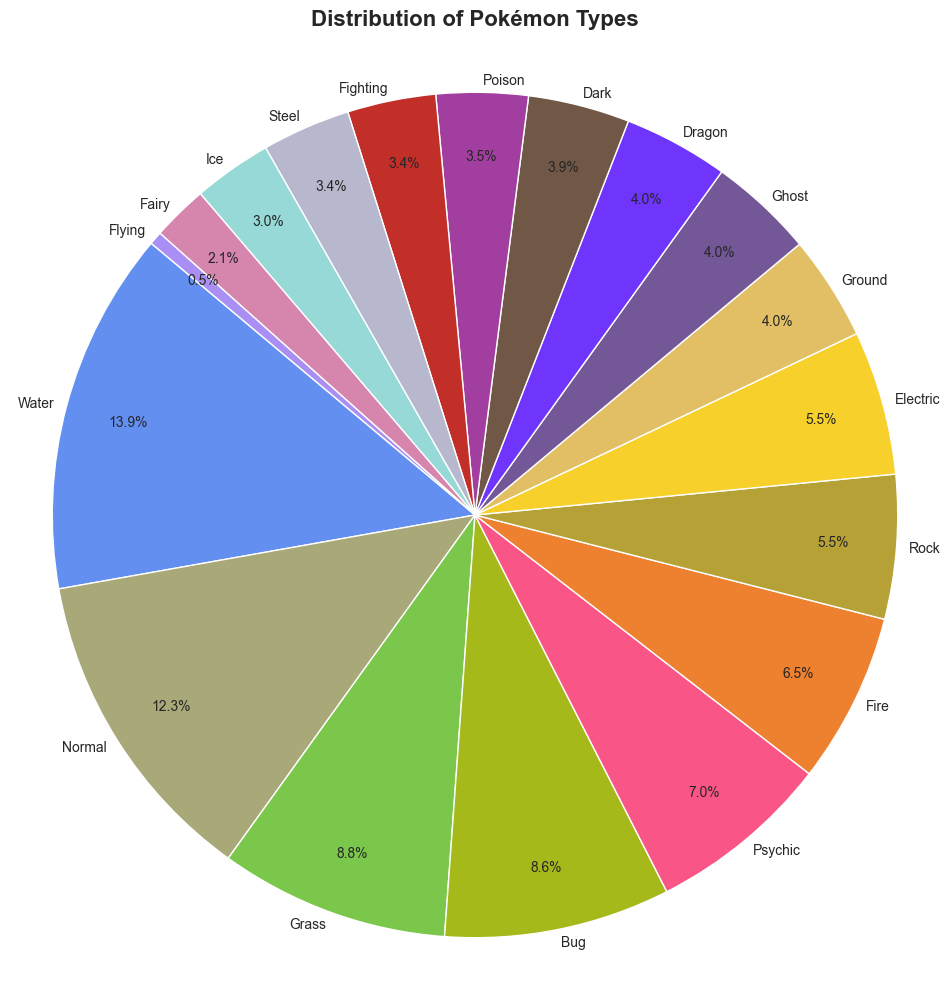

In [94]:
# Define colors for each Pokémon type
type_colors = {
    'Water': '#6390F0',      # Blue
    'Fire': '#EE8130',       # Red/Orange
    'Grass': '#7AC74C',      # Green
    'Electric': '#F7D02C',   # Yellow
    'Psychic': '#F95587',    # Pink
    'Ice': '#96D9D6',        # Light Blue
    'Dragon': '#6F35FC',     # Purple
    'Dark': '#705746',       # Dark Brown
    'Fighting': '#C22E28',   # Dark Red
    'Poison': '#A33EA1',     # Purple
    'Ground': '#E2BF65',     # Brown/Yellow
    'Flying': '#A98FF3',     # Light Purple
    'Bug': '#A6B91A',        # Light Green
    'Rock': '#B6A136',       # Brown
    'Ghost': '#735797',      # Dark Purple
    'Steel': '#B7B7CE',      # Silver/Gray
    'Normal': '#A8A878',     # Beige
    'Fairy': '#D685AD'       # Light Pink
}

# Get the counts and corresponding colors
type_counts = df['TYPE 1'].value_counts()
colors = [type_colors.get(ptype, '#CCCCCC') for ptype in type_counts.index]

plt.figure(figsize=(12, 12))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, textprops={'fontsize': 10},
        labeldistance=1.03, pctdistance=0.85)
plt.title('Distribution of Pokémon Types', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()